In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from umap import UMAP
import plotly.express as px

plt.rcParams['figure.figsize'] = [10, 8]
sns.set_style('darkgrid')

In [2]:
dataset = pd.read_csv('/kaggle/input/pimaindiansdiabetes/diabetes.csv')
Y = dataset[['Outcome']]
X = dataset.drop(columns=['Outcome'])

display(Y)
display(X)

# Generate profile report
"""
profile = ProfileReport(dataset)
profile.to_file(output_file='report.html')
"""

FEATURES_LIST = X.columns.values.tolist()

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [3]:
# Missing value check
print(dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


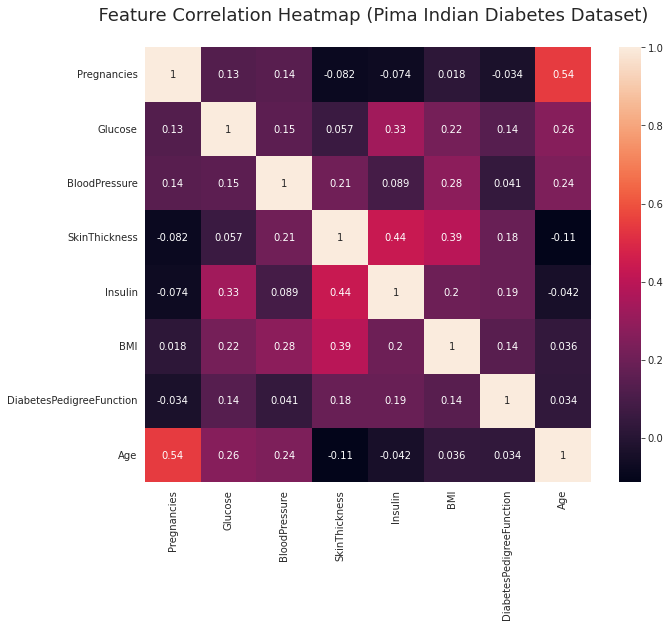

In [5]:
corr = X.corr()

heatmap = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0) 
heatmap.set_title('  Feature Correlation Heatmap (Pima Indian Diabetes Dataset)\n', fontsize=18)
plt.show()

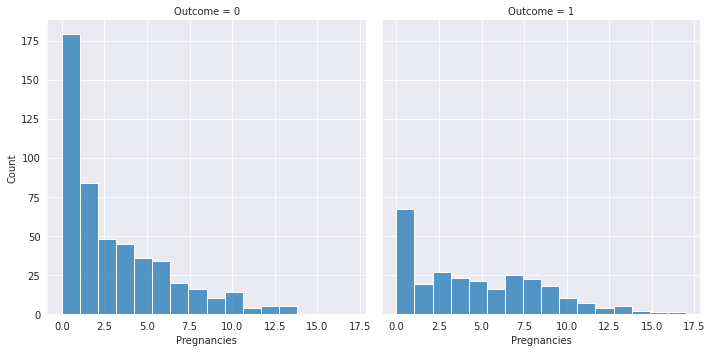

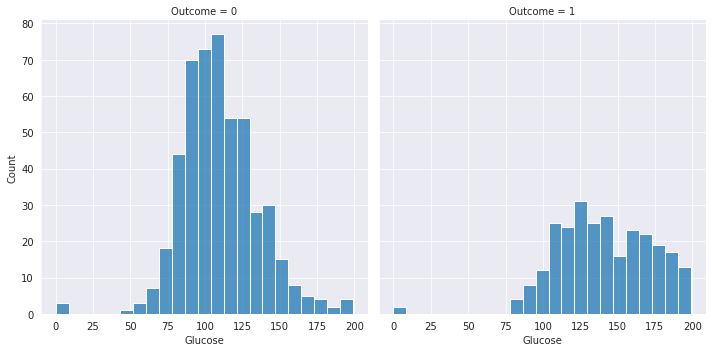

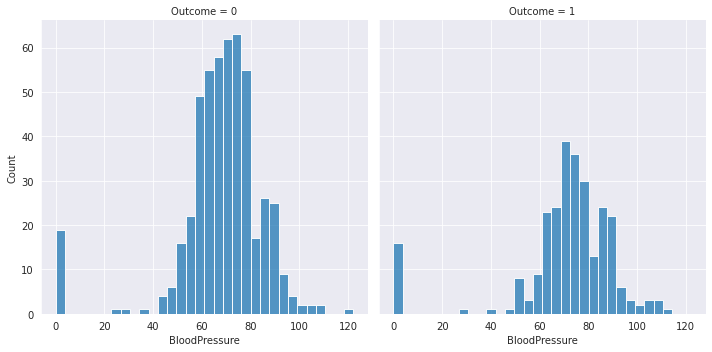

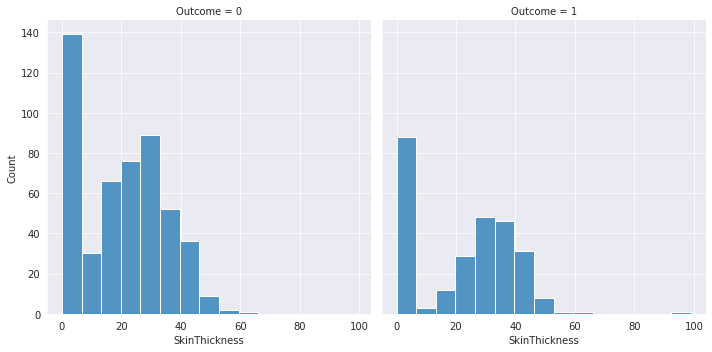

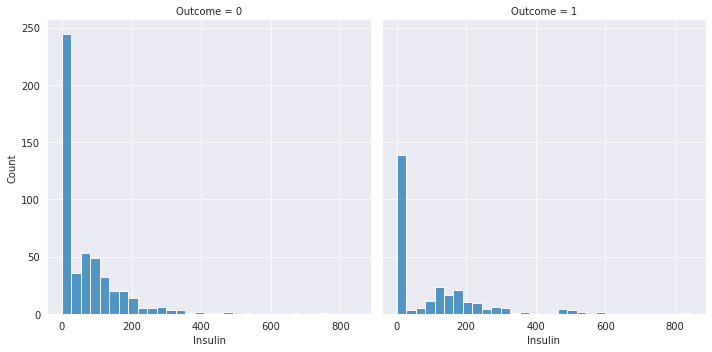

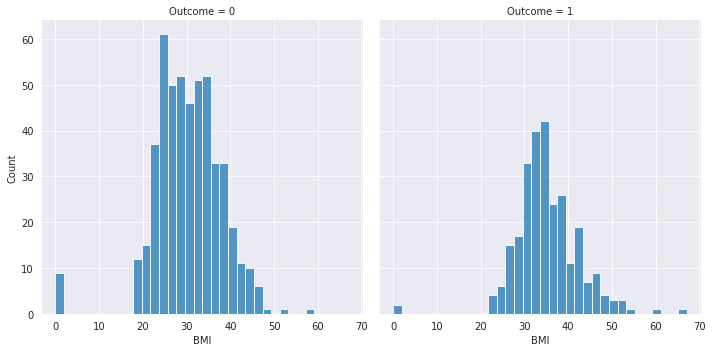

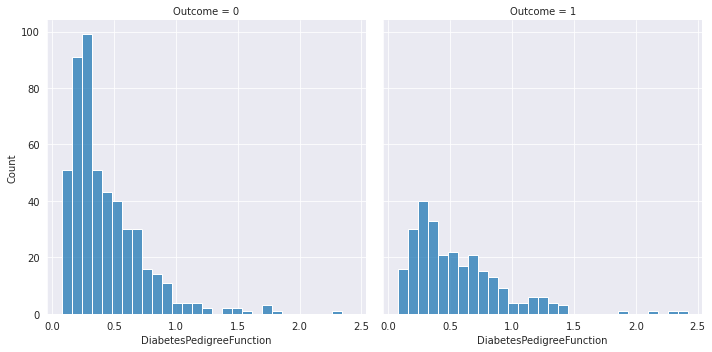

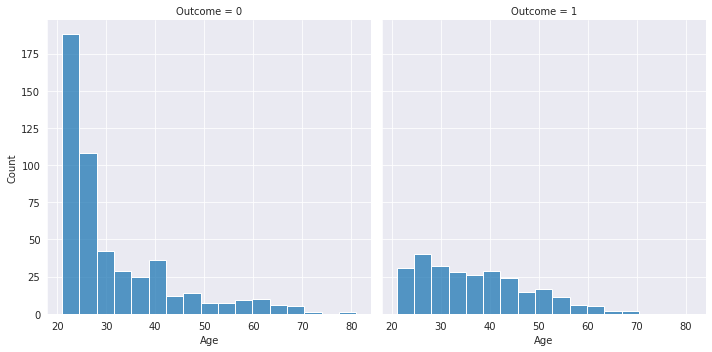

In [6]:
# Perform basic exploratory analysis of the dataset
for feature in FEATURES_LIST:
    plot = sns.displot(data=dataset, x=feature, col='Outcome')
    plt.show()

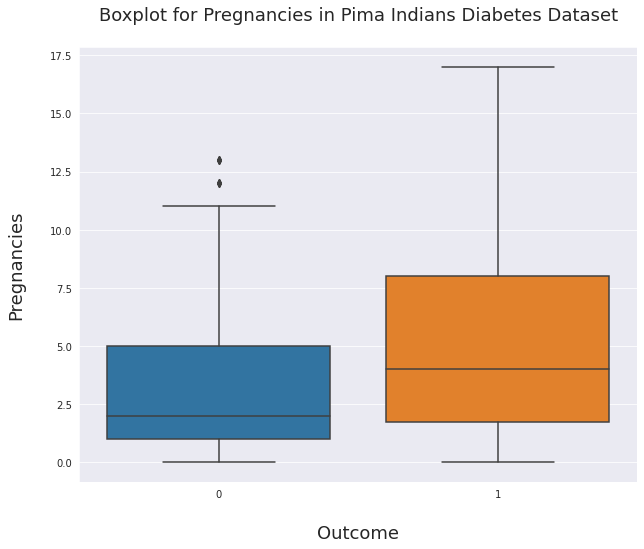

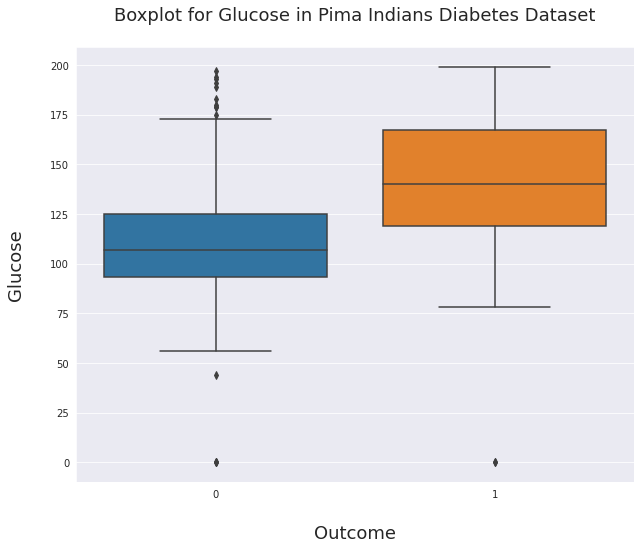

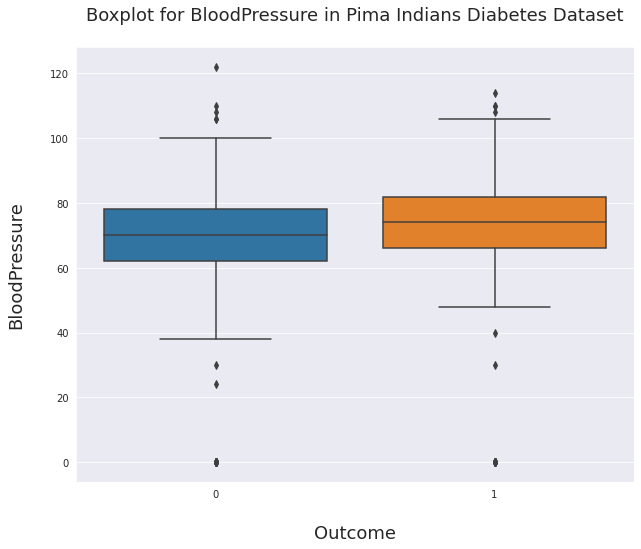

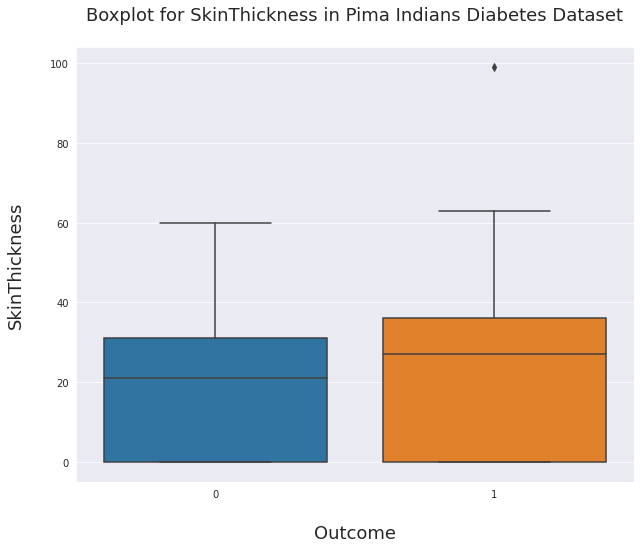

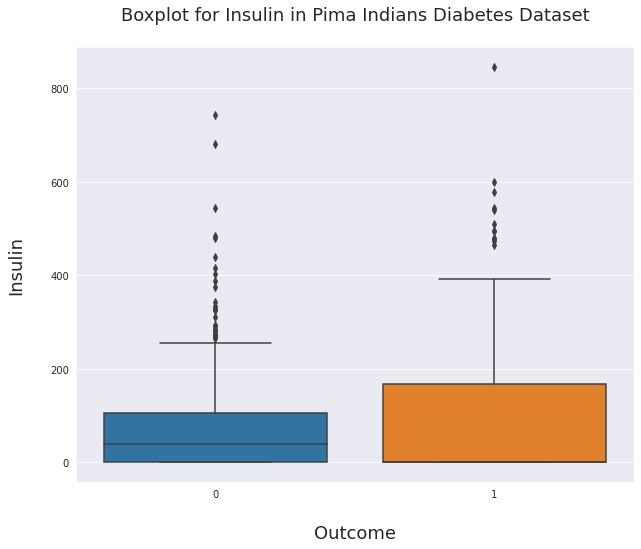

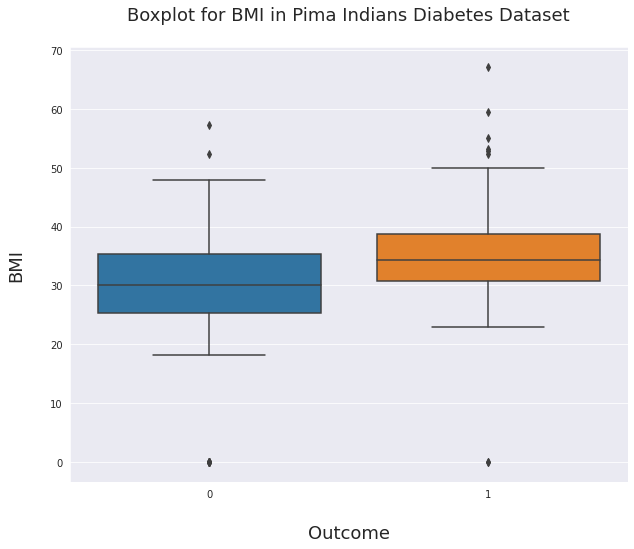

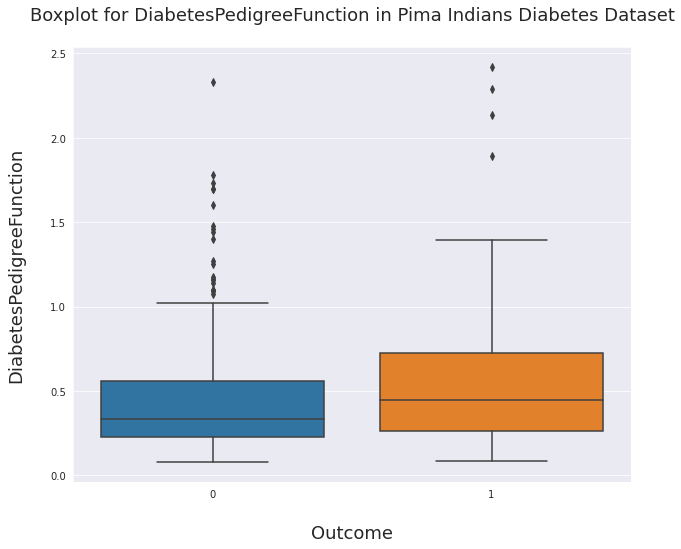

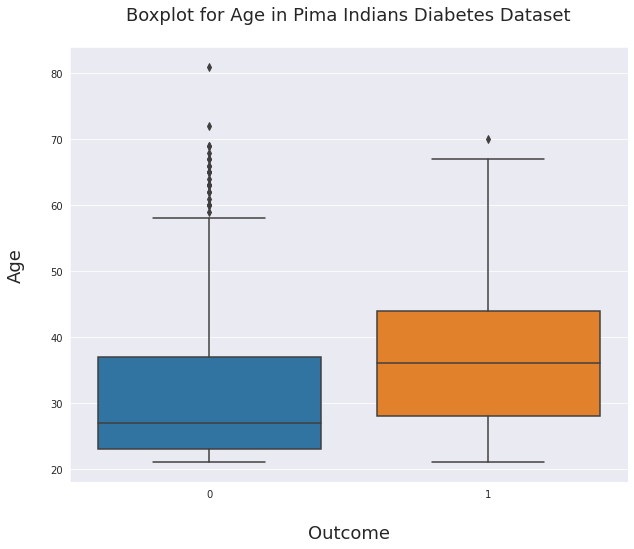

In [7]:
for feature in FEATURES_LIST:
    plot = sns.boxplot(data=dataset, x = 'Outcome', y = feature)
    plot.set_title(f'Boxplot for {feature} in Pima Indians Diabetes Dataset\n', fontsize=18)
    plot.set_xlabel('\nOutcome', fontsize=18)
    plot.set_ylabel(feature + '\n', fontsize=18)
    plt.show()

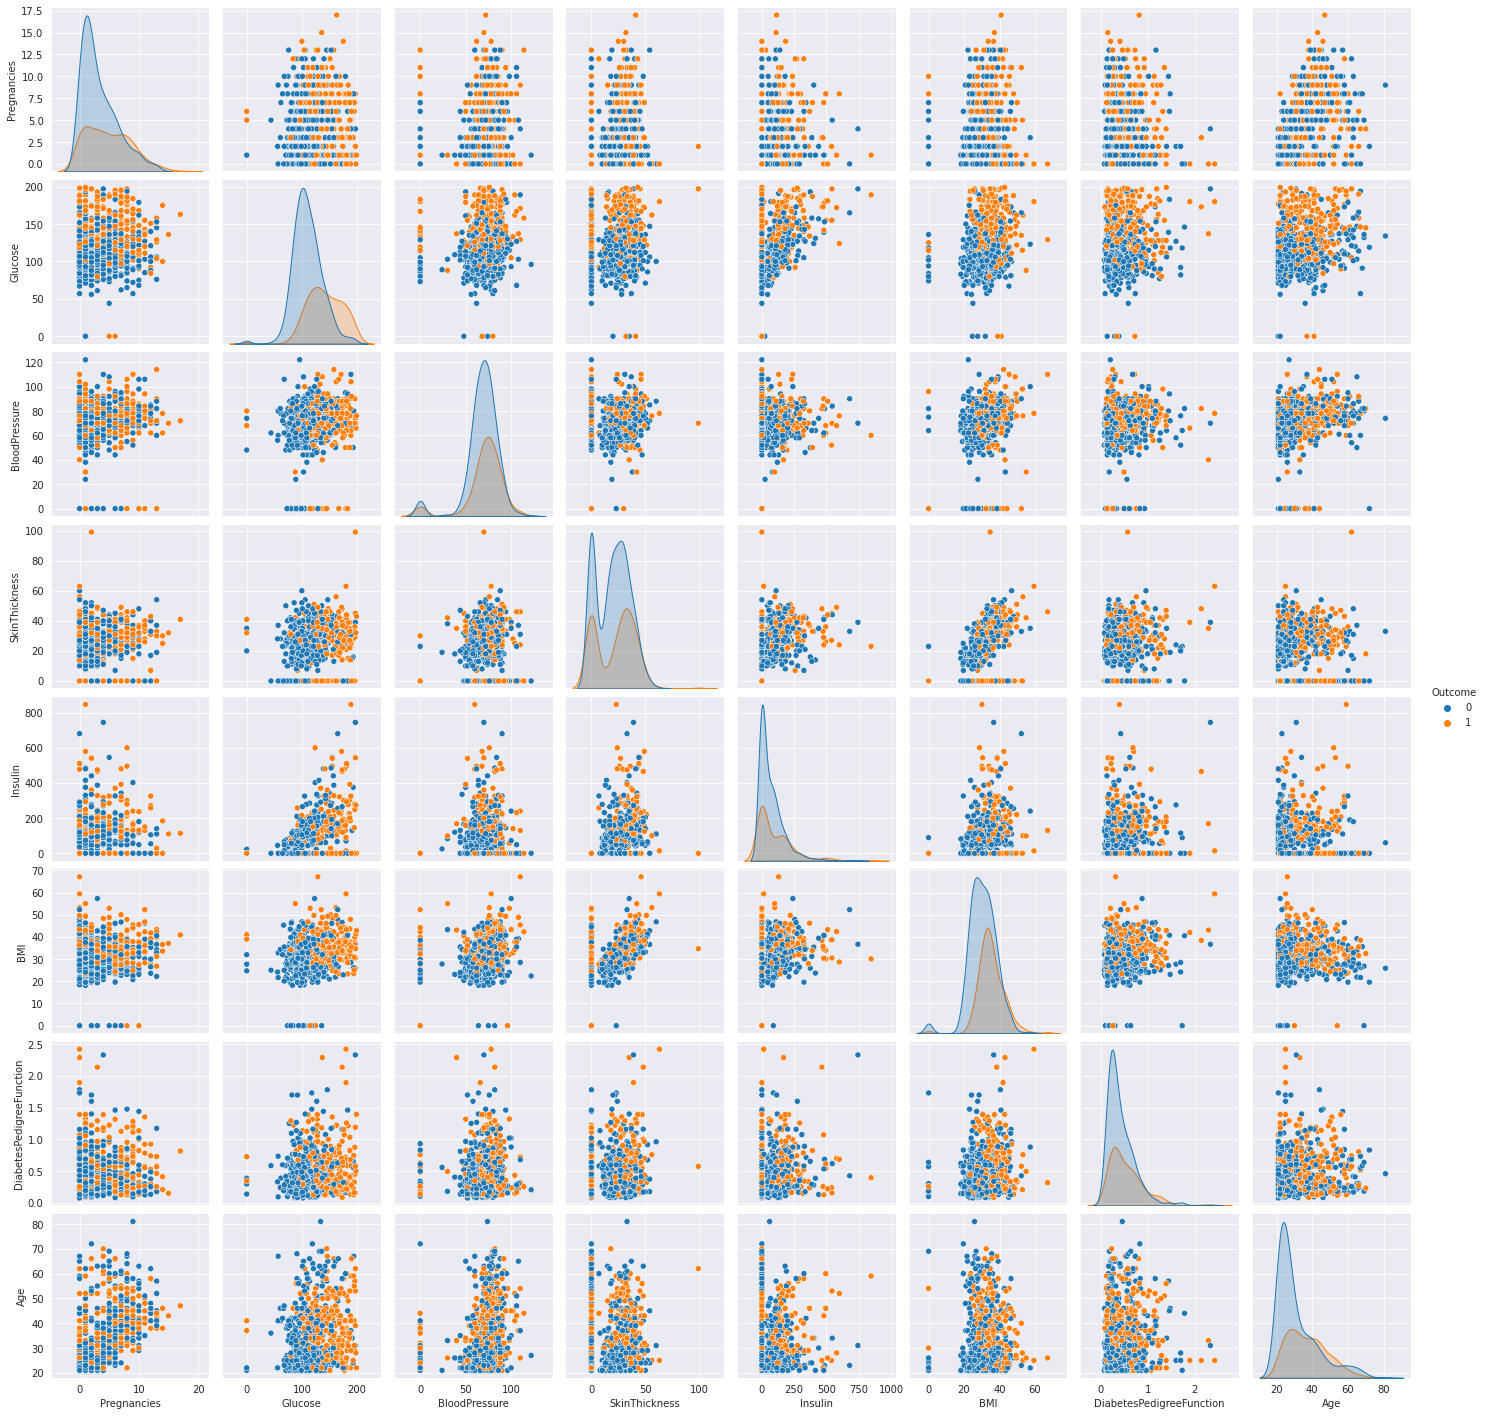

In [8]:
sns.pairplot(data=dataset, hue = 'Outcome')
plt.show()

In [9]:
# TSNE - 2D
tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(X)

fig = px.scatter(
    projections,
    x = 0,
    y = 1,
    color = dataset['Outcome'],
    labels={'color': 'Outcome'}
)
fig.update_layout(
    title={
        'text': 'Pima Indians Diabetes Dataset - TSNE 2D Visualization',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.update_traces(marker_size=8)
fig.show()

In [10]:
# UMAP - 2D
umap = UMAP(n_components=2, random_state=0)
projections = umap.fit_transform(X)

fig = px.scatter(
    projections,
    x = 0,
    y = 1,
    color = dataset['Outcome'],
    labels={'color': 'Outcome'}
)
fig.update_layout(
    title={
        'text': 'Pima Indians Diabetes Dataset - UMAP 2D Visualization',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.update_traces(marker_size=8)
fig.show()

In [11]:
# TSNE - 3D
tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(X)
fig = px.scatter_3d(
    projections,
    x = 0,
    y = 1,
    z = 2,
    color = dataset['Outcome'],
    labels = {'color': 'Outcome'}
)
fig.update_layout(
    title={
        'text': 'Pima Indians Diabetes Dataset - t-SNE 3D Visualization',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.update_traces(marker_size=8)
fig.show()

In [12]:
# UMAP - 3D
umap = UMAP(n_components=3, random_state=0)
projections = umap.fit_transform(X)
fig = px.scatter_3d(
    projections,
    x = 0,
    y = 1,
    z = 2,
    color = dataset['Outcome'],
    labels = {'color': 'Outcome'}
)
fig.update_layout(
    title={
        'text': 'Pima Indians Diabetes Dataset - UMAP 3D Visualization',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.update_traces(marker_size=8)
fig.show()